# TIME SERIES ANALYSIS

# Goal: Find outliers, trends and periodicity in the MTA turnstile data
    

## DATA:
MTA subway fares. It is a complete dataset of
rides logged by card swipes for 600 Manhattan stations.


The data was organized  by Dr. Sina Kashuk at CUSP.
You can get it from the github repo (use the download link to download it live in your notebook). 
It contains 23 different subway card types 
(e.g. monthly pass, daily pass, Act for Disability pass…) as follows:


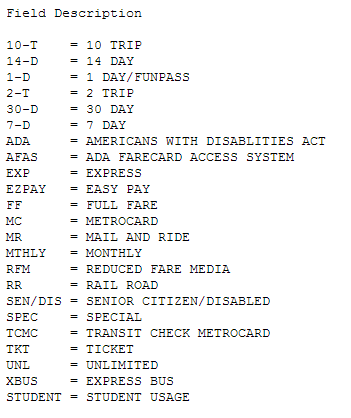

In [1]:
from IPython.display import Image
Image(filename = "Ridetypes.png")

## Each time series (per station, per ticket type) contains the number of swipes per week for 194 weeks from 05/21/2010 to 02/21/2014. 

The data are available to you as a *python data cube*. you can load it as 

```
np.load(“MTA_Fare.npy")
```

and you will end up with a python numpy array of 
shape (600, 23, 194)




## Task 1: 
### Event detection: Identify the most prominent event. There is a very significant drop (>3-sigma) in all time series.
### Identify it, figure out the date (you know when the data starts and what the cadence is) and figure out what it is due to.


## Task 2: 
### Some of the time series are stationary, some have a complex structure, some show a downward trend: Identify the **ridership types**  that have steadily increased in popularity,  and that have steadily decreased. by how much? (e.g what is the ratio of usage in the first 10 and last 10 weeks)


## Task 3:
### Several stations show a prominent annual periodicity. Identify the 4 **stations** (indentify them by the index of their location in the data cube) that show the most prominent periodic trend on an annual period (52 weeks). (Can you figure out what the periodic peak in rides is due to?)


## EXTRA CREDIT: Cluster. 
### Cluster the time series, i.e. identify groups of time series that look similar among each other. You can use KMeans for example to identify common trends, or PCA (Principle Component Analysis). 
### Since this is extra credit I will leave it to you to figure out the details, but for KMeans for e.g. if you use the sklearn.cluster package it would look something like:

i am flattening the first 2 dimensions of the cube to cluster all light curves for all stations and all types

```
tots = data.transpose(2,0,1).reshape(data.shape[2], data.shape[1]*data.shape[0]).T
```

removing empty light curves

```
tots = tots[tots.std(1)>0]
```

with Kmeans you have to choose the number of clusters ahead km = 

```
KMeans(n_clusters=10)
```

and standardize the lightcurves before clustering. Notice: standardize, not whiten! If you have done clustering before you may have whitened the data: removed the variance by "column", here you want to remove the variance by "row". We will discuss this in the clustering lecture. 
```
vals = ((tots.T - tots.mean(1))/tots.std(1)).T
```

then you can run:

```
km.fit(vals)
```

# HINTS: 

## notes and hints: 

   1) you could coerce the data into a pandas dataframe, but the data is truly a "datacube": a 3D dataset, and flattening it into a pandas dataframe will make it far more difficult to manipulate. I strongly recommand you keep it as a numpy array
    
   2) note that the missing values are inputted as -1. if you want to do things like algebra (summing time series for example) you need to take care of that. If you replace the -1 entries with NaN, you may need to use functions that explicitly know how to deal with NaN: for example, to sum use the np.nansum etc
```
np.nanmean(mtarides)
np.nansum(mtarides)
```
as opposed to just 
```
np.mean(mtarides)
np.sum(mtarides)
```
 
## There are 600 stations, 23 card types. The trick to do this homework succesfully is to "collaps" (by averaging, or summing, depending on the question) the appropriate dimension in different parts of the homework: when you need to work at the station level (if I ask "which station is the one that..."), collaps the card type, when you need to work on the card type, collapse the stations. 

When I ask you "which station ...", you can sum or average over the ridership types for all station and reduce your data by a factor 23. When I ask you "which rideship type ..." you can sum or average over the stations and reduce your data by a factor 600! (or even better you could take a weighted average - *np.average(....weight=...)* -. The sum and average functions take an *axis* argument, which allows you to control which axis of the cube gets averaged. The dimension of the resulting object will allow you to check that you averaged over the right axis.


# Possibly useful functions

You are already familiar with and have already used  most of the functions I needed to perform this exercise. Here are some reminders and on few functions and methods that you may not have encountered yet which may be useful. You do not have to use them: there are many ways to do things and you do not have to solve this problem like I did, but here they are in case you need some help:

* the numpy function np.where() returns the index where a condition is true. It is slow and inefficient but very intuitive and convenient


* the nupy functions np.nansum(), np.sum(), np.nanmean() etc take an array and the axis along which to sum as inputs. If you want to sum over stations, or over rides, you can use these passing the appropriate axis number: axis=1 axis=2...


* to find periodicity you can use fourier transforms. Look at the notebook on fourier transforms in https://github.com/fedhere/UInotebooks/tree/master/timeseries. If you choose to use the numpy package you may want to use the real fft function:  np.fft.rfft()  

```
np.fft.rfft(mydata) 
```  

      will return the *real* part of the fourier transform (the fourier transform is a *complex* object, and therefore it has a real and an *imaginary* component - that is just math; all you need to know is that you need the real part). But what you want is its absolute value: np.abs(). 
      To plot the fourier transform you may want the x-axis to be in frequency. To get the x-axis of your plot in frequency (1/week since the data is in weeks) you can use the function 

```
np.fft.rfftfreq(N, d) 
```     
     which takes as arguments N = the length of your time series (the number of datapoints) and d: the *sample spacing*, or 1.0/sampling_rate (in this case, with 1/week sampling, if you want the freq in units of week that is just 1!)


*  the array methods 
```
np.array.flatten()
np.array.reshape()
```
     allow you to manipulate the shape of an array, for example if you want to run analysis on each individual time series, each station and each ridership type, which I recommand if you want to work on clustering for extra credit (resulting into 600*23=13800 time series) you can flatten the array as
     
```
mtaarray.flatten()
```

    which returns the flatten array:

```
mtaRides = np.load("MTA_Fare.npy")

mtaRides.shape
Out[10]: (600, 23, 194)

mtaRides.flatten().shape
Out[11]: (2677200,)
````

*  after you operate on the array to collapse an axis, always check the dimensionality to assure you have indeed collapsed the right axis! see cell below

```
import numpy as np
data = np.random.rand(100,10)

print(data.shape)
Out[12]: (100, 10)

print(data.mean())
Out[13]:  0.4902457782

print(data.mean(axis=0).shape, data.mean(axis=1).shape)
Out[14]: (10,) (100,)

```

In [2]:
import numpy as np
from scipy import stats
import os
import json
import pylab as pl

import matplotlib
%matplotlib nbagg
%pylab inline

import pandas as pd

from sklearn.cluster import KMeans
import pandas as pd
from sklearn.linear_model import LinearRegression
from operator import itemgetter, attrgetter
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from scipy.spatial.distance import cdist, pdist


Populating the interactive namespace from numpy and matplotlib


In [3]:
#read rides data
mtaRides = np.load(os.getenv("PUIDATA") + "/MTA_Fare.npy").astype(float)

In [4]:
#after reading the datacube you should see:
mtaRides.shape


(600, 23, 194)

In [5]:
len(mtaRides[mtaRides==-1])

649563

In [6]:
#replace "-1" data with NaN
mtaRides[mtaRides==-1] = np.nan

ride types list

In [7]:
ridetype = np.array(['10t', '14d', '1d', '2t', '30d', '7d', 'ada', 'afas', 'exp','ez',
            'ff','mc','mr','month','rfm','rr','sen','spec','tcmc','t',
            'umlim','xbus','stud'])

In [8]:
#after that I create a date range (for example with pd.date_range())
#in a log plot to enhance the visibility along the y axis (np.log10(weightedrides[i]))
#all time series, each station each ride type, look like this (pretty ugly)

In [9]:
week = pd.date_range('2010-05-21', '2014-02-21', freq="w")

In [10]:
stationsum = np.nansum(mtaRides, axis=1)

/Users/cihe/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log10
  """


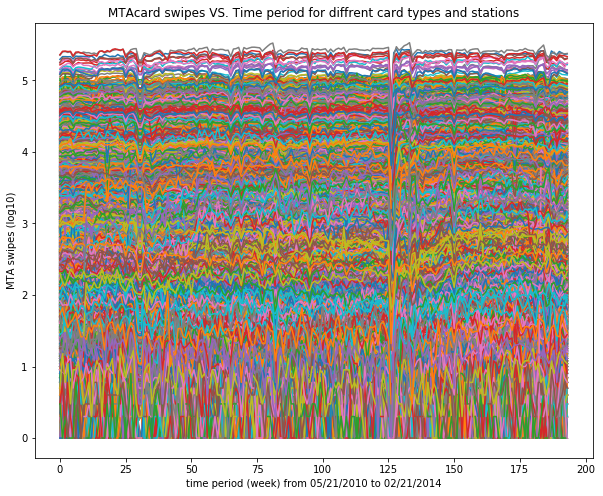

In [11]:
#plot all swipes from all stations and all card types
plt.figure(figsize=(10,8))
for i in range(mtaRides.shape[0]):
    for j in range(mtaRides.shape[1]):
        plt.plot(range(mtaRides.shape[2]), np.log10(mtaRides[i,j,:]))
plt.title("MTAcard swipes VS. Time period for diffrent card types and stations")
plt.xlabel("time period (week) from 05/21/2010 to 02/21/2014")
plt.ylabel("MTA swipes (log10)")

Fig1 MTAcard swipes VS. Time period for diffrent card types and stations

# Task1

In [12]:
#swipes mean by ride type
#mtastation = np.nanmean(mtaRides, axis=1)

#swipes sum by ride type
mtastation = np.nansum(mtaRides, axis=1)

In [13]:
#swipes mean of all stations
stationmean = np.nanmean(mtastation, axis=0)

In [14]:
#find the week over 3std from mean
ridesmean = stationmean.mean()
ridesstd = stationmean.std()
threshold = [ridesmean - 3*ridesstd, ridesmean + 3*ridesstd]
indx = np.where((stationmean > threshold[1])|(stationmean < threshold[0]))
indx[0][0]

126

In [15]:
#identify the week with over 3 std from mean
week[indx[0][0]+1]

Timestamp('2012-10-28 00:00:00', freq='W-SUN')

# The significant event happened on week begining on Sunday, 10/28/2017, according to the news record, that was Hurrican Sandy, the NYC shut down the city on monday, so barely anyone was out taking subway.)

# Task2

In [16]:
#sum of all stations swipes
mtacard_cardtype = np.nansum(mtaRides, axis=0)

In [17]:
mtacard_cardtype.shape

(23, 194)

In [18]:
mtacard_cardtyperolling = np.zeros(mtacard_cardtype.shape)
for i in range(mtacard_cardtype.shape[0]):
    mtacard_cardtyperolling[i,:] = pd.rolling_mean(mtacard_cardtype[i,:], 10)

/Users/cihe/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pd.rolling_mean is deprecated for ndarrays and will be removed in a future version
  This is separate from the ipykernel package so we can avoid doing imports until


to determine if there is a trend or strucutre you can inspect the time series visually, since there are only 23!
an alternative, algorithmic way to do it, is to fit a line to the (smoothed) time series  and look at the residuals.

In [19]:
#print all std and ratio of the first to the last 10 weeks rides sum, it can also be done by calucate ratio
#of the first 10 weeks mean to the last 10 weeks mean 
for i in range(mtacard_cardtype.shape[0]):
    print("\n {} card std is {}".format(ridetype[i],np.std(mtacard_cardtype[i,:])))
    #ratio of first 10 weeks rides to last 10 weeks rides
    print("flux ratio beginning to end is{}".format(pd.rolling_sum(mtacard_cardtype[i,:],10)[9]/pd.rolling_sum(mtacard_cardtype[i,:],10)[193]))


 10t card std is 1212509.3037106844
flux ratio beginning to end is0.978667087301948

 14d card std is 90631.5940000506
flux ratio beginning to end is0.798680546019993

 1d card std is 7599.2274134305335
flux ratio beginning to end is0.8998104766215429

 2t card std is 17590.591685515585
flux ratio beginning to end is1.0708892716419318

 30d card std is 12633.837135255062
flux ratio beginning to end is0.9673171764848265

 7d card std is 763049.8611806732
flux ratio beginning to end is0.7195551173448234

 ada card std is 1053449.593310842
flux ratio beginning to end is1.1113070203157038

 afas card std is 4061.96023133577
flux ratio beginning to end is4774.478260869565

 exp card std is 110873.90798223857
flux ratio beginning to end is93571.34285714285

 ez card std is 221304.42197520085
flux ratio beginning to end is665798.5555555555

 ff card std is 19630.51410150706
flux ratio beginning to end is1.2212962853319755

 mc card std is 29656.855316016237
flux ratio beginning to end is0.82

/Users/cihe/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: pd.rolling_sum is deprecated for ndarrays and will be removed in a future version
  


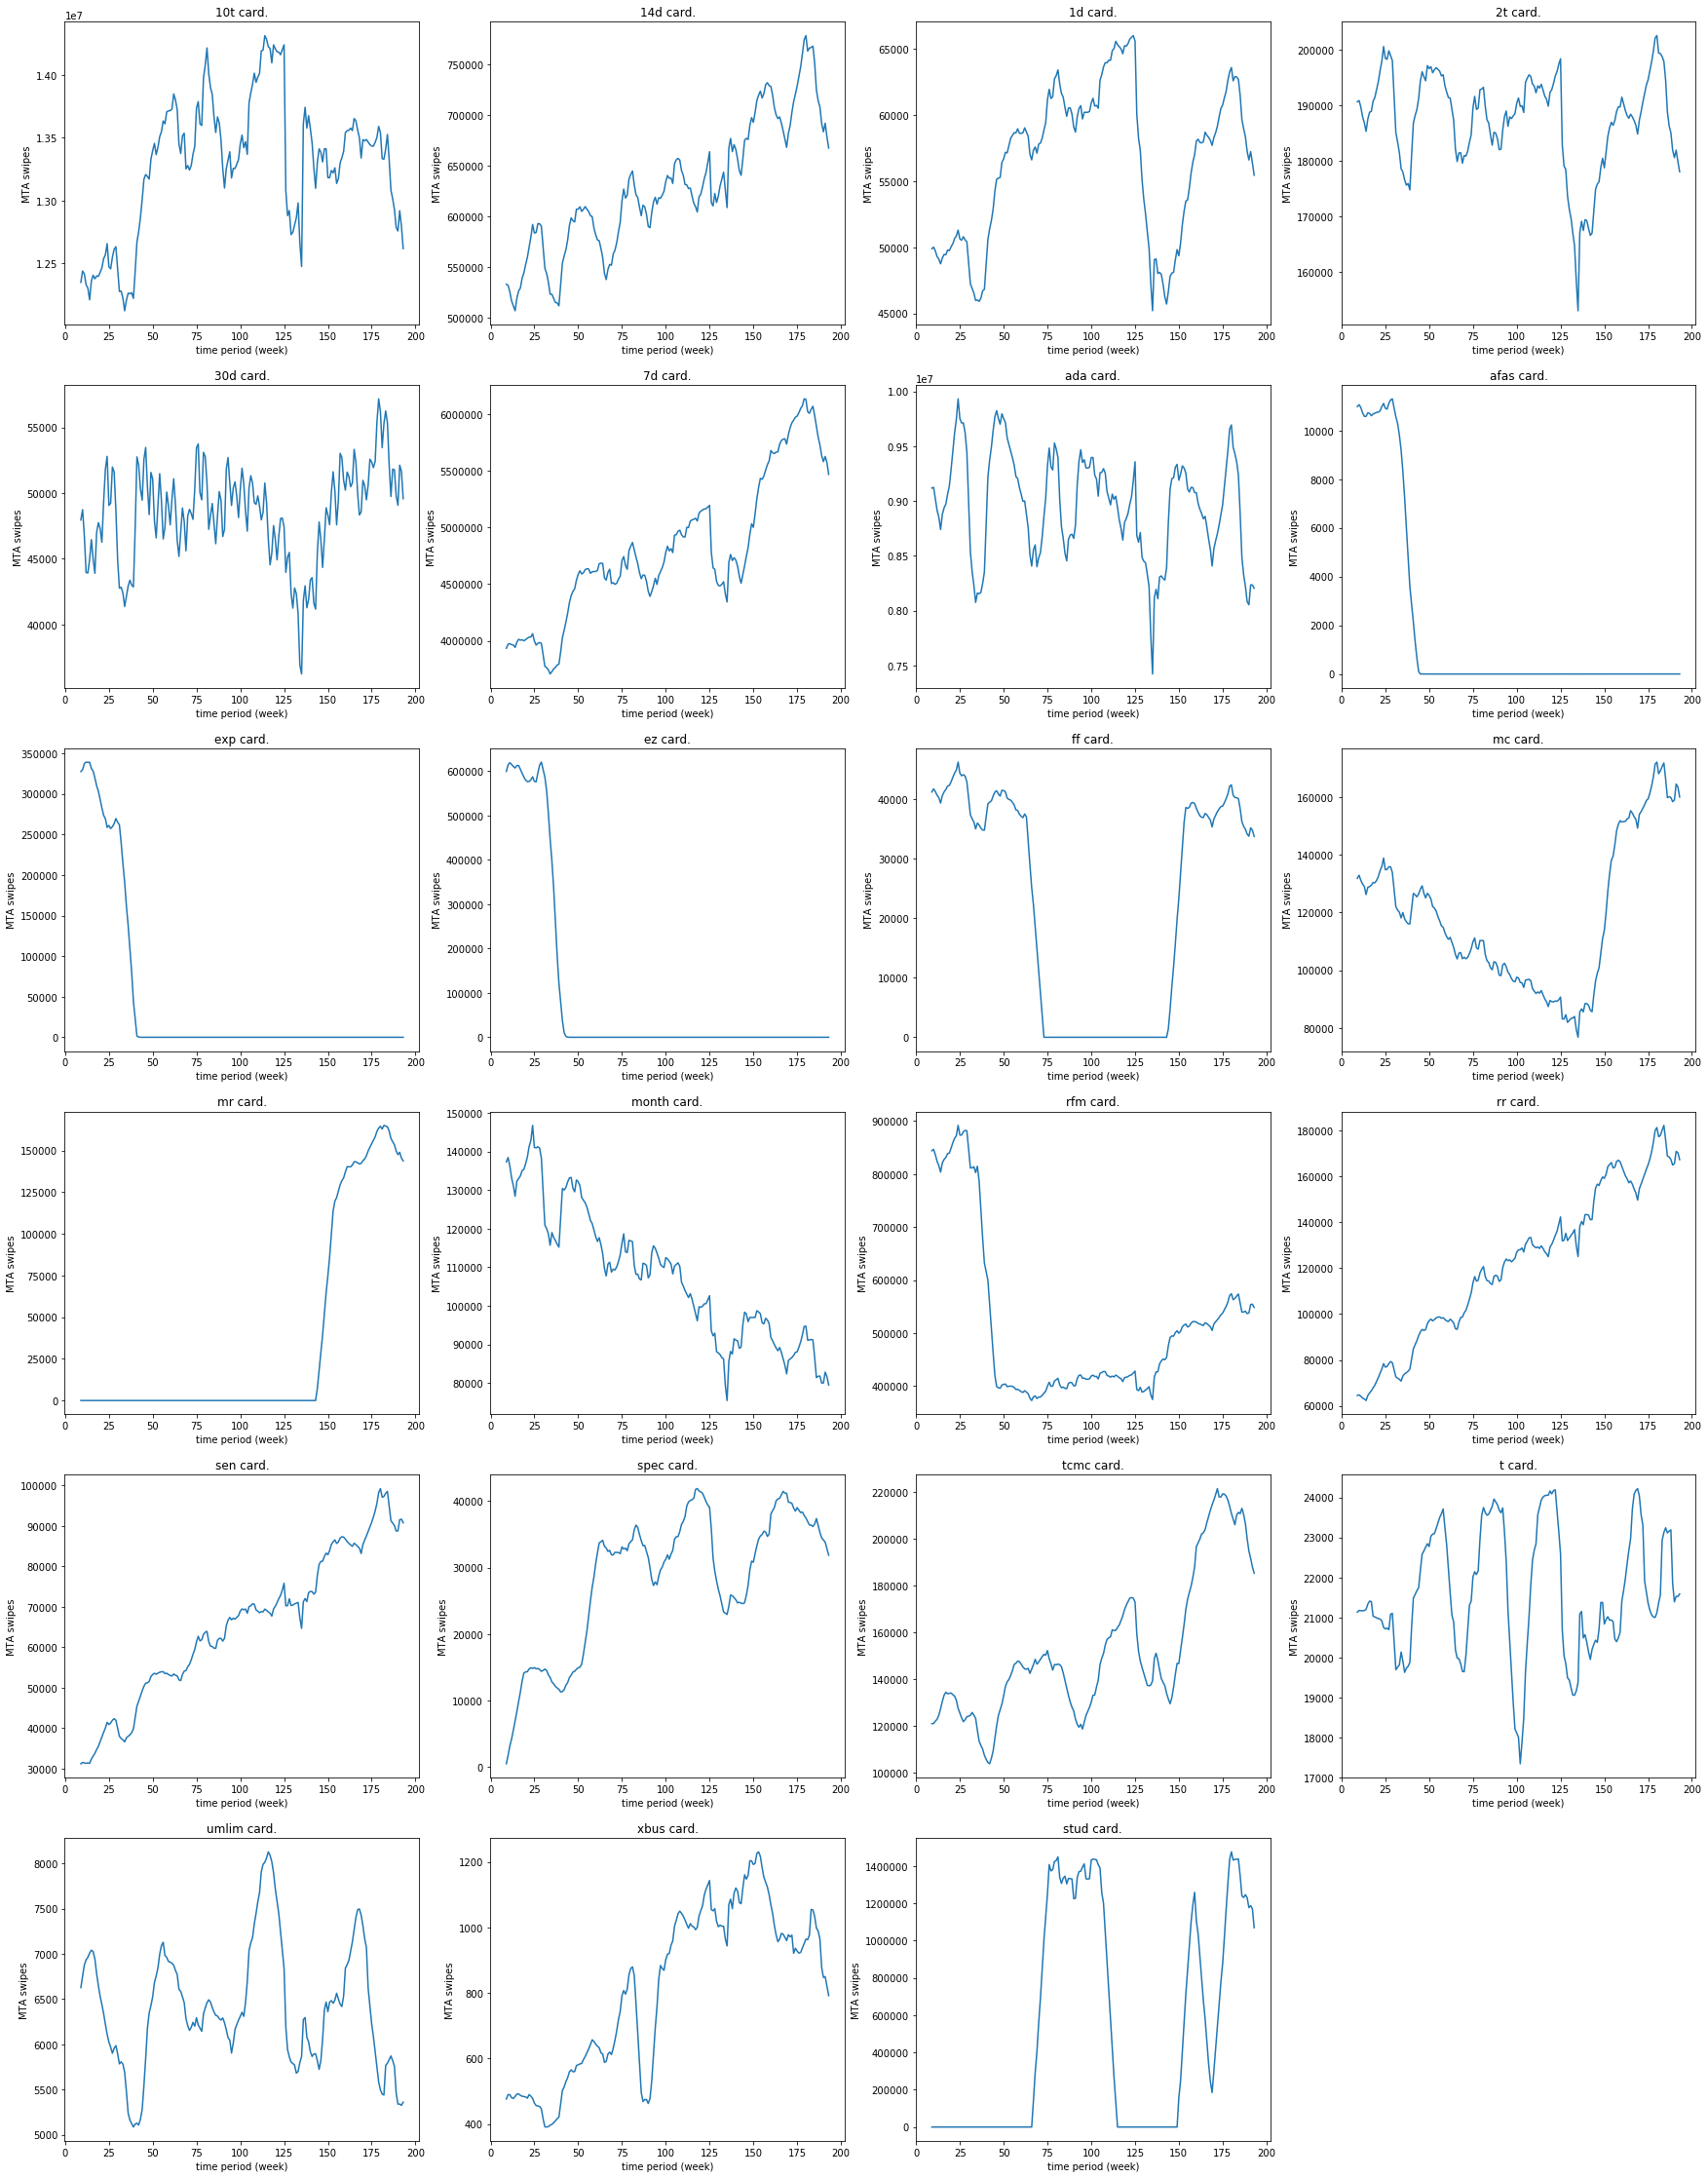

In [20]:
fig = plt.figure(figsize=(30,40))
for j in range(mtacard_cardtype.shape[0]):
#    fig = plt.figure()
    plt.subplot(6,4,j+1)
    plt.plot(mtacard_cardtyperolling[j,:])
    plt.title((ridetype[j]) + " card.")
    plt.xlabel("time period (week)")
    plt.ylabel("MTA swipes")

Fig2 the time period against MTA swipes for 23 different type of cards

# From the visuals in the plots above, we can tell that "14d, 7d, tcmc, rr, sen, xbus, spec" show a clear increasing trend and month type card shows a decresing trend.

flux ratio beginning to end:


increse:

 14d card 0.798680546019993

 7d card 0.7195551173448234

 rr card 0.38565964920251017

 sen card 0.34371386216907385

 spec card 0.014248590833197334

 tcmc card 0.6526260427061329

 xbus card 0.601566447700859
 

decline:

  month card 1.7279442210517704

# Task3

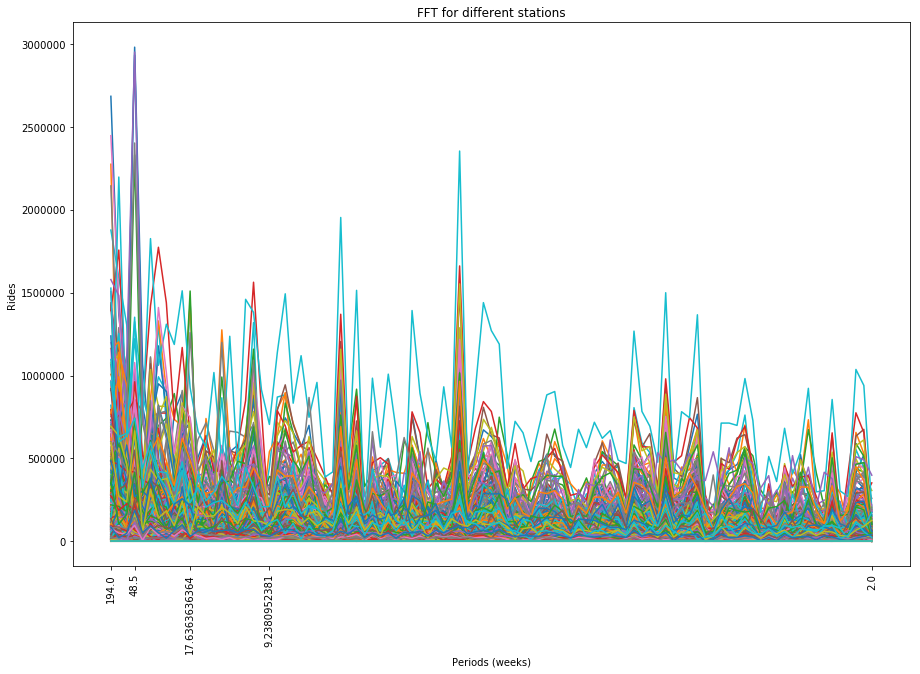

In [21]:
# this is a "power spectrum": the plot of the absolute value of the fourier transform. 
# I changed the xtick labels from frequecy (1/week) to period (in weeks)
# to facilitate the visual identification of the 1-year period peak
# (notice however that np.fft.rfftfreq(N, d)  returns frequency, the inverse of the period: frequency = 1/period. 
# All I did was changing the tick labels): 
fig=plt.figure(figsize=(15,10))
peak = []
for k in range(mtastation.shape[0]):
    f = np.abs(np.fft.rfft(mtastation[k,:]))
    ax=fig.add_subplot(111)
    periods = np.fft.rfftfreq(mtastation[i,:].shape[0], 1)[1:]
    peak.append(f[4])
    ax.plot(periods, (f[1:]))
allperiods = periods[[0, 3, 10, 20, -1]]
ax.set_xticks(allperiods)
ax.set_xlabel("Periods (weeks)")
ax.set_ylabel("Rides")
ax.set_title("FFT for different stations")
ax.set_xticklabels([ "%s"%(1/f) for f in allperiods], rotation=90)

Fig3 power spectrum for all stations

In [22]:
#replace NaN with 0 so we can sort the list and not lose index information(station number)
replaceNaNpeak = np.nan_to_num(peak)
peaksort = sorted(replaceNaNpeak)

In [23]:
print("The 4 stations which have the most prominent periodic trend on an annual period are:\n")
indexsort = np.argsort(replaceNaNpeak)
for m in range(4):     
    print("station", indexsort[-m-1])

The 4 stations which have the most prominent periodic trend on an annual period are:

station 0
station 194
station 150
station 327


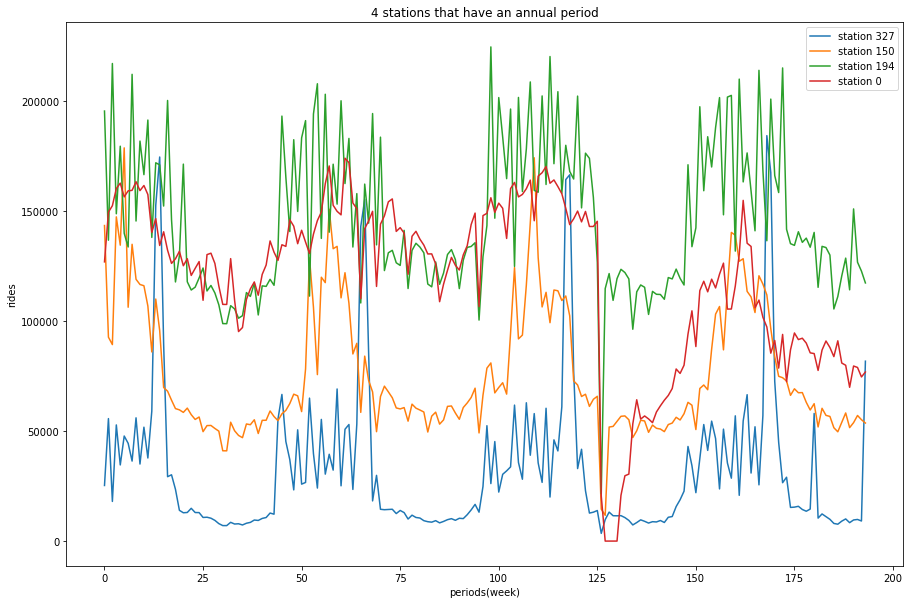

In [24]:
plt.figure(figsize(15,10))
for n in indexsort[-4:]:
    plt.plot(mtastation[n], label = 'station '+str(n))
plt.title('4 stations that have an annual period')
plt.ylabel('rides')
plt.xlabel('periods(week)')
plt.legend(loc = 'best')

Fig 4 stations that have the most prominent periodic trend on an annual period

# Extra Credit

In [25]:
#flatten the first 2 dimensions of the cube to cluster all light curves for all stations and all types
tots = mtaRides.transpose(2,0,1).reshape(mtaRides.shape[2], mtaRides.shape[1]*mtaRides.shape[0]).T
#removing empty light curves
tots = tots[tots.std(1)>0]
vals = ((tots.T - tots.mean(1))/tots.std(1)).T
#vals = (tots - np.nanmean(tots, axis=0)) / np.nanstd(tots, axis=0)

/Users/cihe/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in greater
  after removing the cwd from sys.path.


In [26]:
def elbow(data,K):
#data is your input as numpy form
#K is a list of number of clusters you would like to show.
    # Run the KMeans model and save all the results for each number of clusters
    KM = [KMeans(n_clusters=k).fit(data) for k in K]
    
    # Save the centroids for each model with a increasing k
    centroids = [k.cluster_centers_ for k in KM]

    # For each k, get the distance between the data with each center. 
    D_k = [cdist(data, cent, 'euclidean') for cent in centroids]
    
    # But we only need the distance to the nearest centroid since we only calculate dist(x,ci) for its own cluster.
    globals()['dist'] = [np.min(D,axis=1) for D in D_k]
    
    # Calculate the Average SSE.
    avgWithinSS = [sum(d)/data.shape[0] for d in dist]
    
    
    # elbow curve
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(K, avgWithinSS, 'b*-')
    plt.grid(True)
    plt.xlabel('Number of clusters')
    plt.ylabel('Average within-cluster sum of squares')
    plt.title('Elbow for KMeans clustering')
    plt.show()
    
    
    # Total with-in sum of square plot. Another way to show the result.
    wcss = [sum(d**2) for d in dist]
    tss = sum(pdist(data)**2)/data.shape[0]
    bss = tss-wcss
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(K, bss/tss*100, 'b*-')
    plt.grid(True)
    plt.xlabel('Number of clusters')
    plt.ylabel('Percentage of variance explained')
    plt.title('Elbow for KMeans clustering')
    plt.show()

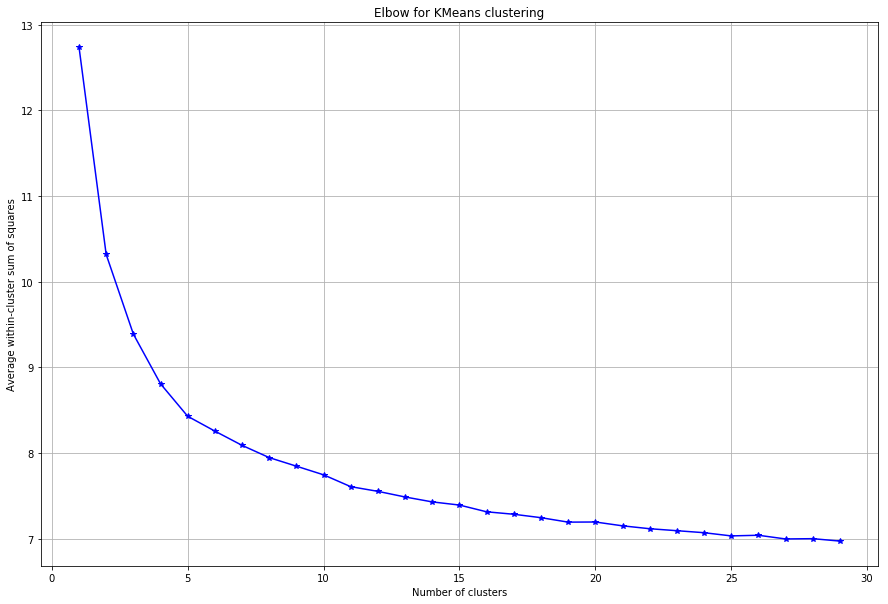

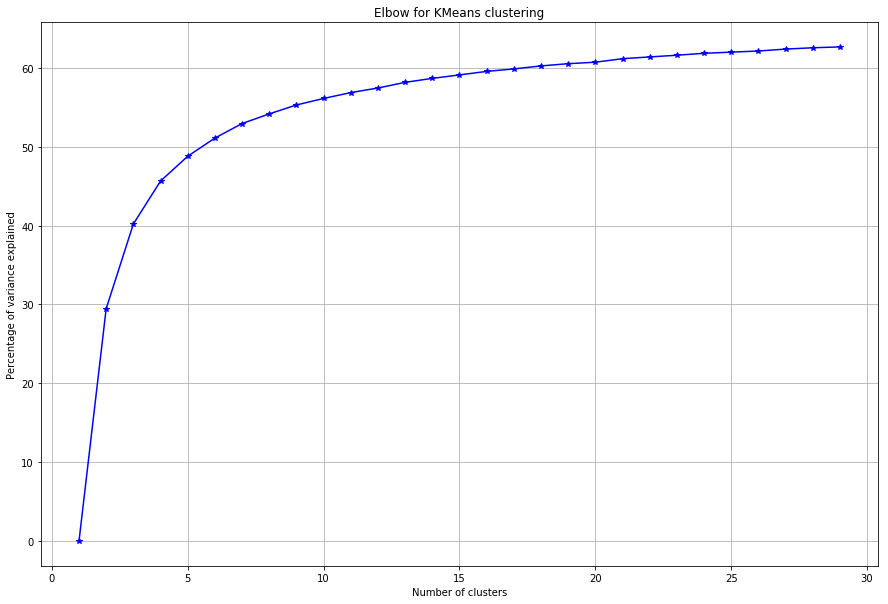

In [27]:
from sklearn.metrics import silhouette_samples, silhouette_score
elbow(vals, range(1,30))

Fig 5  Elbow for Kmeans CLustering, and from the fig let us put the number of clusters as 6.

In [28]:
#with Kmeans you have to choose the number of clusters ahead 
km = KMeans(n_clusters=6).fit(vals)

In [29]:
cluster_label = km.predict(vals)

In [30]:
n = vals.shape[1]
pca = PCA(n)
Xproj = pca.fit_transform(vals)

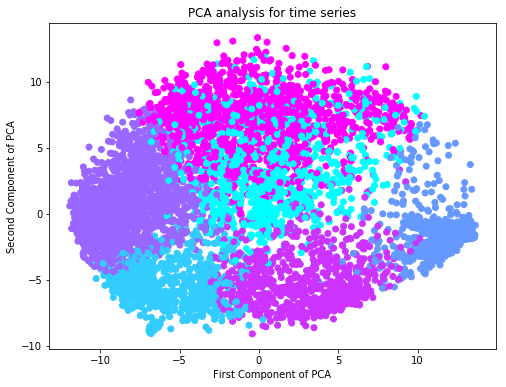

In [31]:
plt.figure(figsize=(8, 6))
plt.scatter(Xproj[:, 0], Xproj[:, 1], c=cluster_label, cmap=plt.cm.cool)
plt.xlabel('First Component of PCA')
plt.ylabel('Second Component of PCA')
plt.title("PCA analysis for time series")
plt.show()

Fig6 PCA clustering for time series